In [1]:
print("""
@File         : max_drawdown.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-02-25 00:08:05
@Email        : cuixuanstephen@gmail.com
@Description  : 最大回撤
""")


@File         : max_drawdown.ipynb
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2024-02-25 00:08:05
@Email        : cuixuanstephen@gmail.com
@Description  : 最大回撤



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 生成一些工作日（假设为交易日）以及收益率
df = pd.DataFrame(
    {
        "trade_date": pd.date_range("2023-01-01", "2024-02-24", freq="B"),
        "rtn": np.random.standard_normal(size=300) / 100,
    }
)

In [4]:
# 计算累积收益率
df["cumsum"] = 1 + df["rtn"].cumsum()
df["cummax"] = df["cumsum"].cummax()
df['dropdown'] = 1 - df['cumsum'] / df['cummax']
max_dropdown = np.max(1 - df["cumsum"] / df["cummax"]) * 100
print(max_dropdown)

16.195895967552822


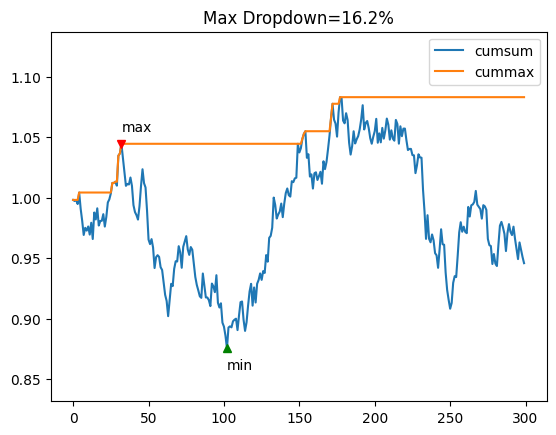

In [5]:
ax = df[["cumsum", "cummax"]].plot()
idx_max_dropdown = df["dropdown"].idxmax()
idx_max_dropdown_cumsum = df.iloc[:idx_max_dropdown]["cumsum"].idxmax()

ax.annotate(
    text="max",
    xy=(idx_max_dropdown_cumsum, df.iloc[idx_max_dropdown_cumsum]["cumsum"] * 1.01),
)
ax.annotate(
    text="min", xy=(idx_max_dropdown, df.iloc[idx_max_dropdown]["cumsum"] * 0.98)
)
ax.plot([idx_max_dropdown_cumsum], [df.iloc[idx_max_dropdown_cumsum]["cumsum"]], "rv")
ax.plot([idx_max_dropdown], [df.iloc[idx_max_dropdown]["cumsum"]], "g^")
ax.set_ylim(df["cumsum"].min() * 0.95, 1.05 * df["cumsum"].max())
ax.set_title(f"Max Dropdown={max_dropdown:.4}%")
plt.show()